Our model is given as

$$\begin{equation}
P(X_i | X_S) \propto \exp(\phi_i(X_i)^T \psi_{i, S}(X_S))
\end{equation}$$

We first experiment for the binary variable case when $X \in \{0, 1\}^n$.

Then we define learnable embedding $\phi_i(X_i) = z_{i,v} \in \mathbb{R}^d$ with $v = X_i$ for each $i \in [n]$ and $X_i \in \{0, 1\}$, and $d$ is the embedding dimension.

We define $\psi_{i, S}(X_S)$ as

$$\begin{equation}
\psi_{i, S}(X_S) = aggregate(\{(i, j, \phi'(X_j))\}_{j\in S})
\end{equation}$$

or letting $i, j$ represented as a vectors $b_i, b_j \in \mathbb{R}^d$ and $\psi'(X_j)$ as $z_{j, v}$ for $v = X_j$.

Ways to implement $aggregate$ function

#### Average

$$\begin{equation}
\psi_{i, S}(X_S) = 1/|S|\sum_{j\in S} (b_j + b_i + z_{j,X_j})
\end{equation}$$

#### Attention

$$\begin{align}
w'_{jk} &= (b_j + b_i + z_{j, X_j})^T(b_k+b_i+z_{k, X_k})\\
w_{jk} &= \exp(w'_{jk}/\sqrt{d})/\sum_{k\in S}\exp(w'_{jk}/\sqrt{d})\\
\psi_{i, S}(X_S) &= 1/|S|\sum_{j\in S}\sum_{k\in S} w_{jk}(b_k + b_i + z_{k, X_k})
\end{align}$$



#### Next Steps

Multiple rounds of message passing, either through attention or MLP.

### Experiments
Data generated by a random DAG (edge probability = 0.2, max parents = 10) with random CPT (distributed with Drichlet distribution) for varying numner of variables in \{10, 25, 50, 100}.

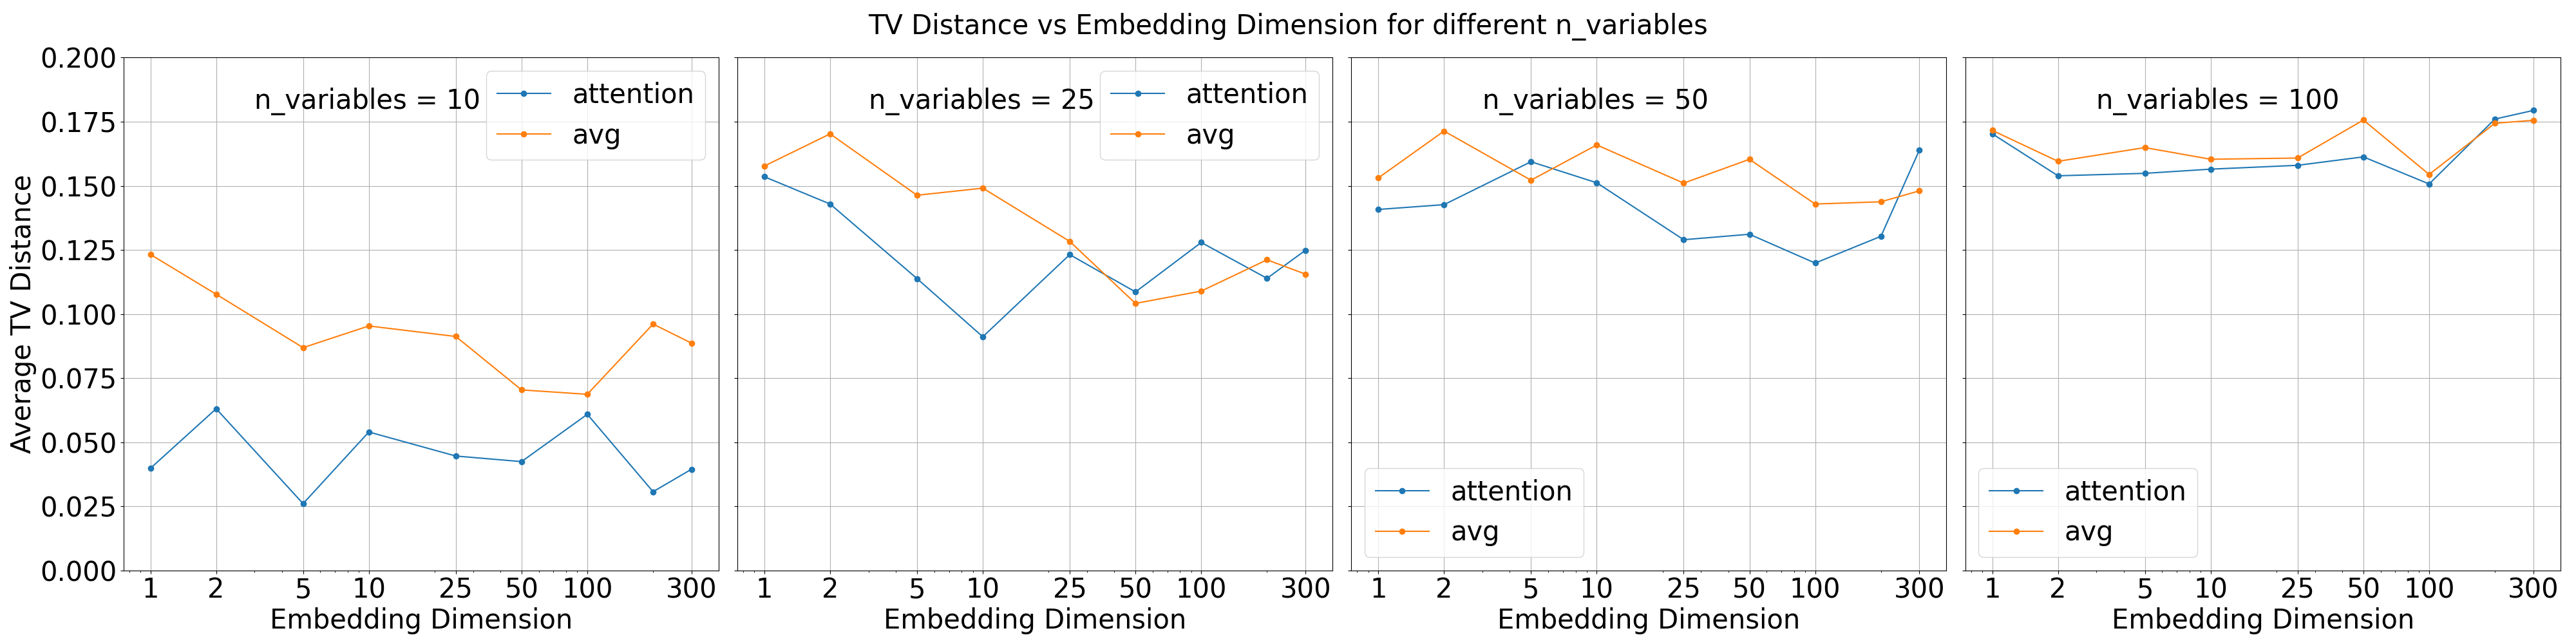

In [2]:
from IPython.display import Image, display

# Display image
display(Image(filename='tv_dist_vs_embedding_dim.png'))